In [13]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df_gs = pd.read_csv('titanic_data/gender_submission.csv')
df_test = pd.read_csv('titanic_data/test.csv')
df_train = pd.read_csv('titanic_data/train.csv')

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print(len(df_train))

891


In [5]:
### 欠損値の確認
missing_counts = df_train.isnull().sum()
missing_counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin（客室番号）の欠損が多い。
しかし家族なら同じ客室番号ではないだろうか。

In [6]:
pd.pivot_table(df_train, index='Survived', columns='Pclass', values='Age', aggfunc=len)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [7]:
pd.pivot_table(df_train, index='Survived', columns='Embarked', values='Age', aggfunc=len)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [22]:
a = pd.pivot_table(df_train, index='Pclass', columns='Embarked', values='Age', aggfunc=len)
a

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [23]:
b = pd.pivot_table(df_train[df_train['Survived']==1], index='Pclass', columns='Embarked', values='Age', aggfunc=len)
b

Embarked,C,Q,S
Pclass,,,
1,59,1,74
2,9,2,76
3,25,27,67


In [25]:
b/a

Embarked,C,Q,S
Pclass,,,
1,0.694118,0.500000,0.582677
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


In [16]:
pd.pivot_table(df_train, index='Survived', columns='SibSp', values='Age', aggfunc=len)

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


In [17]:
pd.pivot_table(df_train, index='Survived', columns='Parch', values='Age', aggfunc=len)

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


In [19]:
pd.pivot_table(df_train, index='Survived', columns='Sex', values='Age', aggfunc=len)

Sex,female,male
Survived,,
0,81,468
1,233,109


Nameの観察

In [9]:
### Mr などの種類の把握 ###
import pandas as pd
import re

# 最初のカンマまでの文字列を抽出する関数
def extract_before_comma(name):
    comma_index = name.find(",")
    return name[:comma_index].strip() if comma_index != -1 else None

# 新しいカラム 'FamilyName' に抽出結果を入れる
df_train['FamilyName'] = df_train['Name'].apply(extract_before_comma)

# 出現回数をカウント
FN_counts = df_train['FamilyName'].value_counts()

print(FN_counts.head(30))
print(len(FN_counts))

FamilyName
Andersson     9
Sage          7
Panula        6
Skoog         6
Carter        6
Goodwin       6
Johnson       6
Rice          5
Lefebre       4
Asplund       4
Harris        4
Fortune       4
Baclini       4
Brown         4
Hart          4
Kelly         4
Harper        4
Smith         4
Gustafsson    4
Palsson       4
Williams      4
Ford          4
Johansson     3
Davies        3
Jussila       3
Flynn         3
Hickman       3
Thayer        3
West          3
Laroche       3
Name: count, dtype: int64
667


In [30]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


In [37]:
df_train['SameFamilyName_Count'] = df_train.groupby('FamilyName')['FamilyName'].transform('count')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FamilyName_Count,Ticket_Count,SameFamilyName_Count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,3,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,2,2,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,1,1,1


In [11]:
### もしかしてチケットで同行かわかる？
Ticket_counts = df_train['Ticket'].value_counts()
Ticket_counts.head(30)

Ticket
347082           7
CA. 2343         7
1601             7
3101295          6
CA 2144          6
347088           6
S.O.C. 14879     5
382652           5
LINE             4
PC 17757         4
17421            4
349909           4
113760           4
4133             4
113781           4
W./C. 6608       4
2666             4
19950            4
347077           4
C.A. 31921       3
PC 17572         3
C.A. 34651       3
363291           3
F.C.C. 13529     3
345773           3
248727           3
24160            3
29106            3
SC/Paris 2123    3
35273            3
Name: count, dtype: int64

もしかしたらチケットと家族はほぼ同じ情報か？
検証の価値あり。

In [43]:
df_train['SameTicket_Count'] = df_train.groupby('Ticket')['Ticket'].transform('count')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FamilyName_Count,Ticket_Count,SameFamilyName_Count,SameTicket_Count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2,2,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,1,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,3,1,3,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,2,2,2,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,1,1,1,1


In [45]:
pd.pivot_table(df_train, index='Survived', columns='SameFamilyName_Count', values='Age', aggfunc=len)

SameFamilyName_Count,1,2,3,4,5,6,7,9
Survived,,,,,,,,
0,342.0,79.0,54.0,32.0,5.0,23.0,7.0,7.0
1,192.0,87.0,30.0,24.0,NaN,7.0,NaN,2.0


In [46]:
pd.pivot_table(df_train, index='Survived', columns='SameTicket_Count', values='Age', aggfunc=len)

SameTicket_Count,1,2,3,4,5,6,7
Survived,,,,,,,
0,384.0,80.0,19.0,22.0,10.0,18.0,16.0
1,163.0,108.0,44.0,22.0,NaN,NaN,5.0


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

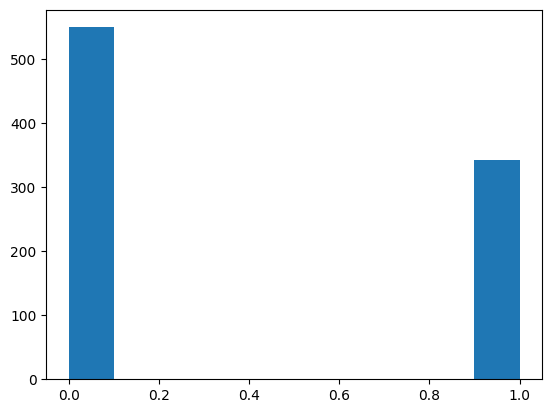

In [15]:
plt.hist(df_train['Survived'])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

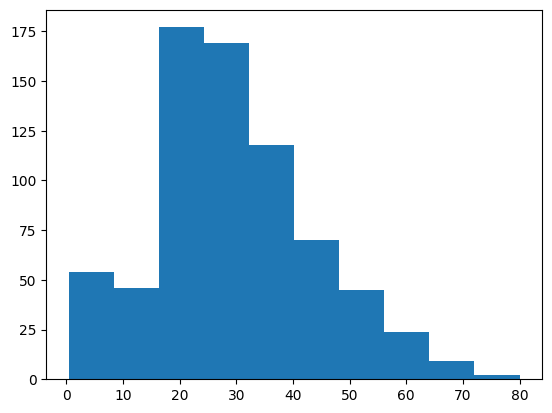

In [26]:
plt.hist(df_train['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

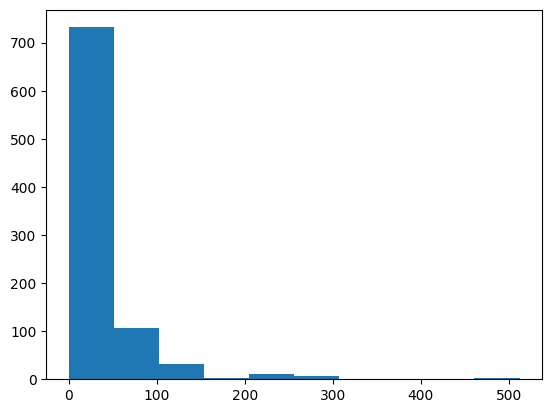

In [28]:
plt.hist(df_train['Fare'], bins=10)